# Car Sales Data Analysis Project
### First we are going to import all the necessary modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
from sklearn import preprocessing

Now we are going to read the *.csv file that contains all the information that we need and we are also going to show the first five columns

In [3]:
df = pd.read_csv(r'C:/Users/Nathan/Desktop/car_sales.csv')
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


Most dataframes contain missing values. So in order to not have any trouble with our dataframe when we analyze and visualize it we are going to replace the missing values with the average

In [4]:
#Replace NaN with mean()
df['Engine_size'].fillna((df['Engine_size'].mean()), inplace=True)
df['Horsepower'].fillna((df['Horsepower'].mean()), inplace=True)
df['__year_resale_value'].fillna((df['__year_resale_value'].mean()), inplace=True)
df['Price_in_thousands'].fillna((df['Price_in_thousands'].mean()), inplace=True)
df['Power_perf_factor'].fillna((df['Power_perf_factor'].mean()), inplace=True)
df['Fuel_capacity'].fillna((df['Fuel_capacity'].mean()), inplace=True)
df['Curb_weight'].fillna((df['Curb_weight'].mean()), inplace=True)

In [5]:
df.head(20)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360000,Passenger,21.500000,1.8,140.0,101.2,67.3,172.4,2.639000,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875000,Passenger,28.400000,3.2,225.0,108.1,70.3,192.9,3.517000,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225000,Passenger,27.390755,3.2,225.0,106.9,70.6,192.0,3.470000,17.2,26.0,1/4/2012,77.043591
3,Acura,RL,8.588,29.725000,Passenger,42.000000,3.5,210.0,114.6,71.4,196.6,3.850000,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255000,Passenger,23.990000,1.8,150.0,102.6,68.2,178.0,2.998000,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555000,Passenger,33.950000,2.8,200.0,108.7,76.1,192.0,3.561000,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000000,Passenger,62.000000,4.2,310.0,113.0,74.0,198.2,3.902000,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,18.072975,Passenger,26.990000,2.5,170.0,107.3,68.4,176.0,3.179000,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675000,Passenger,33.400000,2.8,193.0,107.3,68.5,176.0,3.197000,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125000,Passenger,38.900000,2.8,193.0,111.4,70.9,188.0,3.472000,18.5,25.0,4/4/2011,83.998724


Now we need a statistical summary of the dataframe

In [6]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,157.000000,157.000000,157.000000,157.000000,156.000000,156.000000,156.000000,157.000000,157.000000,154.000000,157.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,10.045282,14.259359,1.041299,56.518297,7.641303,3.451872,13.431754,0.626447,3.875440,4.282706,24.980973
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,12.545000,18.145000,2.300000,150.000000,103.000000,68.400000,177.575000,2.975000,15.800000,21.000000,60.727447
50%,29.450000,17.710000,23.400000,3.000000,180.000000,107.000000,70.550000,187.900000,3.368000,17.200000,24.000000,72.290355
75%,67.956000,18.140000,31.930000,3.500000,215.000000,112.200000,73.425000,196.125000,3.778000,19.500000,26.000000,89.401935
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


Let's print our values' data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  157 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   157 non-null    float64
 6   Engine_size          157 non-null    float64
 7   Horsepower           157 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          157 non-null    float64
 12  Fuel_capacity        157 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    157 non-null    flo

Now we are going to visualize the correlation between some variables

In [8]:
#First we are going to visualize the whole dataframe's correlation. We are looking for either for strong positive or strong negative correlation
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.00,-0.27,-0.30,0.02,-0.20,0.36,0.14,0.25,0.01,0.09,-0.02,-0.22
__year_resale_value,-0.27,1.00,0.82,0.47,0.70,-0.05,0.16,0.02,0.30,0.28,-0.36,0.74
Price_in_thousands,-0.30,0.82,1.00,0.63,0.84,0.11,0.33,0.16,0.52,0.42,-0.49,0.90
Engine_size,0.02,0.47,0.63,1.00,0.84,0.47,0.69,0.54,0.75,0.66,-0.73,0.82
Horsepower,-0.20,0.70,0.84,0.84,1.00,0.29,0.54,0.39,0.61,0.50,-0.61,0.99
Wheelbase,0.36,-0.05,0.11,0.47,0.29,1.00,0.68,0.84,0.65,0.65,-0.50,0.26
Width,0.14,0.16,0.33,0.69,0.54,0.68,1.00,0.71,0.72,0.66,-0.60,0.51
Length,0.25,0.02,0.16,0.54,0.39,0.84,0.71,1.00,0.63,0.56,-0.45,0.35
Curb_weight,0.01,0.30,0.52,0.75,0.61,0.65,0.72,0.63,1.00,0.86,-0.82,0.61
Fuel_capacity,0.09,0.28,0.42,0.66,0.50,0.65,0.66,0.56,0.86,1.00,-0.80,0.50


                    Horsepower  Price_in_thousands
Horsepower             1.00000             0.83845
Price_in_thousands     0.83845             1.00000


<AxesSubplot:xlabel='Horsepower', ylabel='Price_in_thousands'>

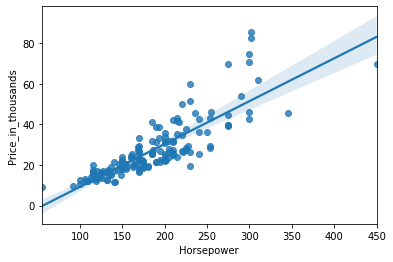

In [9]:
#We are going to find and visualize the correlation between Horsepower and Price
cor = df[['Horsepower', 'Price_in_thousands']].corr()
print(cor)
sns.regplot(x="Horsepower", y="Price_in_thousands", data=df)

                    Power_perf_factor  Price_in_thousands
Power_perf_factor            1.000000            0.897945
Price_in_thousands           0.897945            1.000000


<AxesSubplot:xlabel='Power_perf_factor', ylabel='Price_in_thousands'>

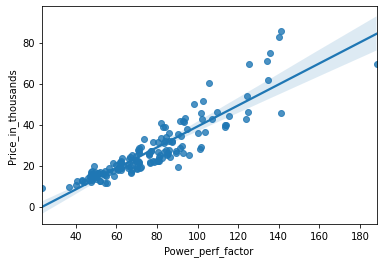

In [10]:
#We are going to find and visualize the correlation between Power Performance Factor and Price
cor1 = df[['Power_perf_factor', 'Price_in_thousands']].corr()
print(cor1)
sns.regplot(x="Power_perf_factor", y="Price_in_thousands", data=df)

                    Engine_size  Price_in_thousands
Engine_size            1.000000            0.626839
Price_in_thousands     0.626839            1.000000


<AxesSubplot:xlabel='Engine_size', ylabel='Price_in_thousands'>

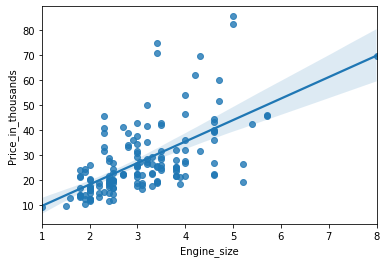

In [11]:
#We are going to find and visualize the correlation between Engine Size and Price
cor2 = df[['Engine_size', 'Price_in_thousands']].corr()
print(cor2)
sns.regplot(x="Engine_size", y="Price_in_thousands", data=df)

                     __year_resale_value  Price_in_thousands
__year_resale_value             1.000000            0.822395
Price_in_thousands              0.822395            1.000000


<AxesSubplot:xlabel='__year_resale_value', ylabel='Price_in_thousands'>

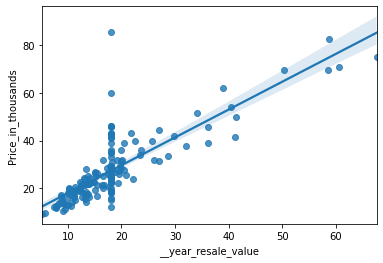

In [12]:
#We are going to find and visualize the correlation between the Year Resale Value and Price
cor3 = df[['__year_resale_value', 'Price_in_thousands']].corr()
print(cor3)
sns.regplot(x="__year_resale_value", y="Price_in_thousands", data=df)

                    Fuel_efficiency  Price_in_thousands
Fuel_efficiency            1.000000           -0.491759
Price_in_thousands        -0.491759            1.000000


<AxesSubplot:xlabel='Fuel_efficiency', ylabel='Price_in_thousands'>

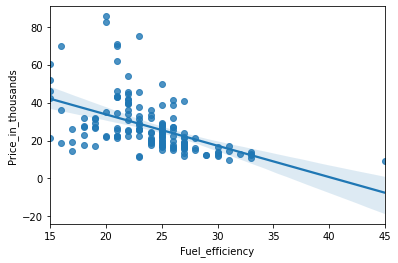

In [13]:
#We are going to find and visualize the correlation between Fuel Efficiency and Price
cor4 = df[['Fuel_efficiency', 'Price_in_thousands']].corr()
print(cor4)
sns.regplot(x="Fuel_efficiency", y="Price_in_thousands", data=df)

                    Sales_in_thousands  Price_in_thousands
Sales_in_thousands            1.000000           -0.304413
Price_in_thousands           -0.304413            1.000000


<AxesSubplot:xlabel='Price_in_thousands', ylabel='Sales_in_thousands'>

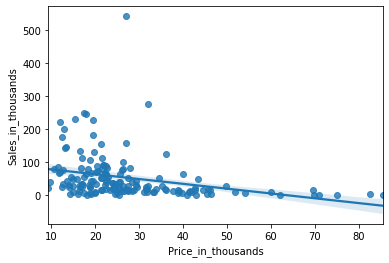

In [14]:
#We are going to find and visualize the correlation between the number of sales and Price
cor5 = df[['Sales_in_thousands', 'Price_in_thousands']].corr()
print(cor5)
sns.regplot(x="Price_in_thousands", y="Sales_in_thousands", data=df)

We see that Horsepower, Engine Size and Year Resale Value and Power Performance Factor have strong positive linear correlation
We also see that Fuel Efficiency and Price have negative linear correlation. This means the more fuel efficient the car is, the cheaper it gets. We can also use these relationships to build some prediction models

## Now let's visualize how many cars each Manufacturer sells

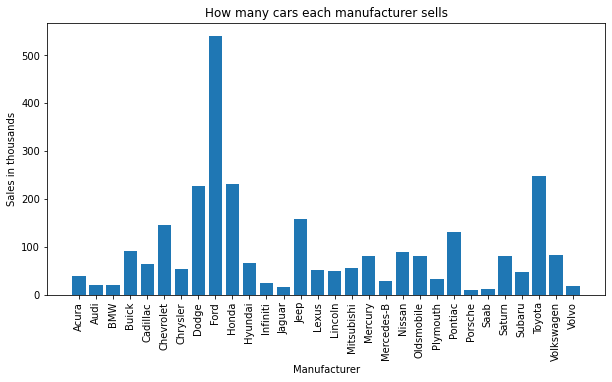

In [15]:
man = df['Manufacturer']
sales = df['Sales_in_thousands'] 

fig = plt.figure(figsize = (10, 5)) 



# creating the bar plot 
plt.bar(man, sales) 

plt.xticks(rotation=90)
plt.xlabel("Manufacturer") 
plt.ylabel("Sales in thousands") 
plt.title("How many cars each manufacturer sells") 
plt.show()

In [16]:
#Now we are going to see which was the most sold car
df.sort_values(by='Sales_in_thousands', ascending=False)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
56,Ford,F-Series,540.561,15.075000,Car,26.935,4.6,220.0,138.5,79.1,224.5,4.241,25.1,18.0,8/16/2012,89.401935
52,Ford,Explorer,276.747,16.640000,Car,31.930,4.0,210.0,111.6,70.2,190.7,3.876,21.0,19.0,4/25/2012,87.635496
137,Toyota,Camry,247.994,13.245000,Passenger,17.518,2.2,133.0,105.2,70.1,188.5,2.998,18.5,27.0,2/10/2011,54.372420
49,Ford,Taurus,245.815,10.055000,Passenger,17.885,3.0,155.0,108.5,73.0,197.6,3.368,16.0,24.0,12/20/2011,62.503740
58,Honda,Accord,230.902,13.210000,Passenger,15.350,2.3,135.0,106.9,70.3,188.8,2.932,17.1,27.0,5/20/2012,54.269548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Porsche,Carrera Coupe,1.280,60.625000,Passenger,71.020,3.4,300.0,92.6,69.5,174.5,3.032,17.0,21.0,12/21/2012,134.390975
108,Oldsmobile,Cutlass,1.112,11.240000,Passenger,18.145,3.1,150.0,107.0,69.4,192.0,3.102,15.2,25.0,5/31/2011,60.861612
99,Mercedes-B,CL500,0.954,18.072975,Passenger,85.500,5.0,302.0,113.6,73.1,196.6,4.115,23.2,20.0,4/11/2011,141.100985
39,Dodge,Viper,0.916,58.470000,Passenger,69.725,8.0,450.0,96.2,75.7,176.7,3.375,19.0,16.0,8/7/2011,188.144323


In [17]:
#Now we are going to see which was the least sold car
df.sort_values(by='Sales_in_thousands', ascending=True)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
83,Mitsubishi,3000GT,0.110,20.940000,Passenger,25.450,3.0,161.0,97.2,72.4,180.3,3.131,19.8,21.0,6/29/2012,67.544155
39,Dodge,Viper,0.916,58.470000,Passenger,69.725,8.0,450.0,96.2,75.7,176.7,3.375,19.0,16.0,8/7/2011,188.144323
99,Mercedes-B,CL500,0.954,18.072975,Passenger,85.500,5.0,302.0,113.6,73.1,196.6,4.115,23.2,20.0,4/11/2011,141.100985
108,Oldsmobile,Cutlass,1.112,11.240000,Passenger,18.145,3.1,150.0,107.0,69.4,192.0,3.102,15.2,25.0,5/31/2011,60.861612
125,Porsche,Carrera Coupe,1.280,60.625000,Passenger,71.020,3.4,300.0,92.6,69.5,174.5,3.032,17.0,21.0,12/21/2012,134.390975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Honda,Accord,230.902,13.210000,Passenger,15.350,2.3,135.0,106.9,70.3,188.8,2.932,17.1,27.0,5/20/2012,54.269548
49,Ford,Taurus,245.815,10.055000,Passenger,17.885,3.0,155.0,108.5,73.0,197.6,3.368,16.0,24.0,12/20/2011,62.503740
137,Toyota,Camry,247.994,13.245000,Passenger,17.518,2.2,133.0,105.2,70.1,188.5,2.998,18.5,27.0,2/10/2011,54.372420
52,Ford,Explorer,276.747,16.640000,Car,31.930,4.0,210.0,111.6,70.2,190.7,3.876,21.0,19.0,4/25/2012,87.635496


In [18]:
#Now we are going to see which was the most expensive car
df.sort_values(by='Price_in_thousands', ascending=False)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
99,Mercedes-B,CL500,0.954,18.072975,Passenger,85.500,5.0,302.0,113.6,73.1,196.6,4.115,23.2,20.0,4/11/2011,141.100985
95,Mercedes-B,SL-Class,3.311,58.600000,Passenger,82.600,5.0,302.0,99.0,71.3,177.1,4.125,21.1,20.0,3/17/2011,139.982294
126,Porsche,Carrera Cabrio,1.866,67.550000,Passenger,74.970,3.4,300.0,92.6,69.5,174.5,3.075,17.0,23.0,7/11/2011,135.914710
125,Porsche,Carrera Coupe,1.280,60.625000,Passenger,71.020,3.4,300.0,92.6,69.5,174.5,3.032,17.0,21.0,12/21/2012,134.390975
39,Dodge,Viper,0.916,58.470000,Passenger,69.725,8.0,450.0,96.2,75.7,176.7,3.375,19.0,16.0,8/7/2011,188.144323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Hyundai,Elantra,66.692,7.825000,Passenger,11.799,2.0,140.0,100.4,66.9,174.0,2.626,14.5,27.0,11/15/2011,54.590045
140,Toyota,Tacoma,84.087,9.575000,Car,11.528,2.4,142.0,103.3,66.5,178.7,2.580,15.1,23.0,8/1/2011,55.297117
129,Saturn,SL,80.620,9.200000,Passenger,10.685,1.9,100.0,102.4,66.4,176.9,2.332,12.1,33.0,8/16/2012,39.986425
62,Hyundai,Accent,41.184,5.860000,Passenger,9.699,1.5,92.0,96.1,65.7,166.7,2.240,11.9,31.0,9/10/2012,36.672284


In [19]:
#Now we are going to see which was the least expensive car
df.sort_values(by='Price_in_thousands', ascending=True)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
26,Chevrolet,Metro,21.855,5.160000,Passenger,9.235,1.0,55.0,93.1,62.6,149.4,1.895,10.3,45.0,4/13/2012,23.276272
62,Hyundai,Accent,41.184,5.860000,Passenger,9.699,1.5,92.0,96.1,65.7,166.7,2.240,11.9,31.0,9/10/2012,36.672284
129,Saturn,SL,80.620,9.200000,Passenger,10.685,1.9,100.0,102.4,66.4,176.9,2.332,12.1,33.0,8/16/2012,39.986425
140,Toyota,Tacoma,84.087,9.575000,Car,11.528,2.4,142.0,103.3,66.5,178.7,2.580,15.1,23.0,8/1/2011,55.297117
63,Hyundai,Elantra,66.692,7.825000,Passenger,11.799,2.0,140.0,100.4,66.9,174.0,2.626,14.5,27.0,11/15/2011,54.590045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,Dodge,Viper,0.916,58.470000,Passenger,69.725,8.0,450.0,96.2,75.7,176.7,3.375,19.0,16.0,8/7/2011,188.144323
125,Porsche,Carrera Coupe,1.280,60.625000,Passenger,71.020,3.4,300.0,92.6,69.5,174.5,3.032,17.0,21.0,12/21/2012,134.390975
126,Porsche,Carrera Cabrio,1.866,67.550000,Passenger,74.970,3.4,300.0,92.6,69.5,174.5,3.075,17.0,23.0,7/11/2011,135.914710
95,Mercedes-B,SL-Class,3.311,58.600000,Passenger,82.600,5.0,302.0,99.0,71.3,177.1,4.125,21.1,20.0,3/17/2011,139.982294


Now we are going to plot the top 10 most sold "Models"

In [20]:
d = df.sort_values(by='Sales_in_thousands', ascending=False)[:10]

<AxesSubplot:xlabel='Model'>

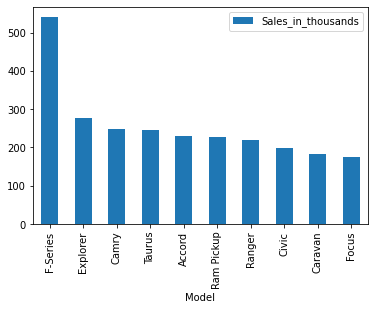

In [21]:
d.plot(x="Model", y="Sales_in_thousands", kind="bar", rot=90, fontsize=10)

Now we are going to plot the 10 least sold models

In [22]:
a = df.sort_values(by='Sales_in_thousands', ascending=True)[:10]

<AxesSubplot:xlabel='Model'>

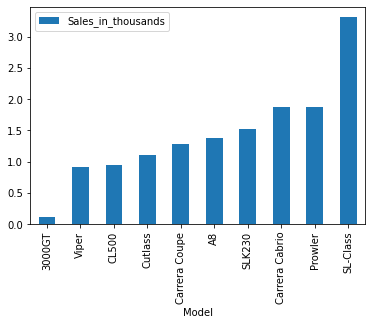

In [23]:
a.plot(x="Model", y="Sales_in_thousands", kind="bar", rot=90, fontsize=10)

Now we are going to plot the 10 most expensive models

<AxesSubplot:xlabel='Model'>

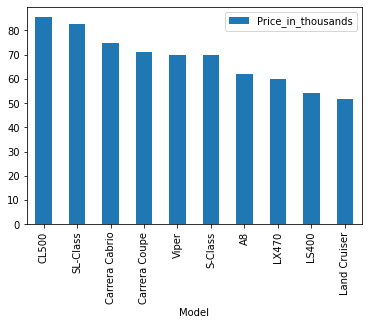

In [25]:
d1 = df.sort_values(by='Price_in_thousands', ascending=False)[:10]
d1.plot(x="Model", y="Price_in_thousands", kind="bar", rot=90, fontsize=10)

Now we are going to plot the 10 least expensive models

<AxesSubplot:xlabel='Model'>

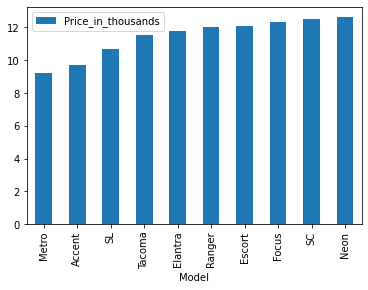

In [26]:
a1 = df.sort_values(by='Price_in_thousands', ascending=True)[:10]
a1.plot(x="Model", y="Price_in_thousands", kind="bar", rot=90, fontsize=10)